# ***Lusanda  Mdhlalose - Anomaly Detection for Diabetic Patients***

***
# ***Introduction***
***

### ***Context***

For this notebook I will be using a clustering algorithm called KMeans clustering along with a dimensionality reduction algorithm called Principal Component Analysis (PCA). I will make use of the Diabetes dataset which belongs to the National Institute of Diabetes and Digestive and Kidney Diseases. The patients in this dataset are 21 years of age and older and are Pima Indians.

<a id="section-4"></a>
### **Table of Contents**
- [Introduction](#1)
  * [Context](#3)
  * [Table of Contents](#4)
  * [Problem Statement](#5)
  * [Data Dictionary](#6)
- [Imports](#7)
  * [Python Libraries](#8)
  * [Dataset](#9)
- [Exploretory Data Analysis](#10)
  * [Data Overview](#11)
  * [Visualizations](#12)
    * [Univariate Analysis](#13)
    * [Bivariate Analysis](#14)
    * [Multivariate Analysis](#15)
- [Data Pre-processing](#19)
  * [Principal Component Analysis](#20)
- [Modelling](#25)
  * [Hyperparameter Tuning](#26)
- [Anomaly Detection](#37)

### ***Problem Statement***

In this notebook I propose an anomaly detector for diabetic patients who need to be immediately treated using KMeans Clustering with Principal Component Analysis (PCA). My intention with PCA is to be able identify features that explain aabout 80% of the variance of the data, helping us discard features without a significant variance and contribution to the detector. This will help us create an effective anomaly detector and save computational time and costs.

### ***Data Dictionary***

- **Pregnancies:** Number of times the patient has been pregnant.
- **Glucose:** Blood sugar level (mg/dL).
- **Blood Pressure:** Pressure of circulating blood against the walls of blood vessels (mmHg).
- **Skin Thicknness:** Depth of the skin ($\mu$ m).
- **Insulin:** Hormone produced by the pancreas (mIU/mL).
- **Body Mass Index (BMI):** Body mass index (units: kg/m$^2$)
- **Diabete Pedigree Function:** A function that outputs a statistical measure or probability, indicating the likelihood or risk of diabetes inheritance within a family.
- **Age:** How old the patient is (years).

***
# ***Imports***
***

## ***Python Libraries***

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


## ***Dataset***

In [ ]:
df = pd.read_csv("/content/diabetes.csv") # Uploading the dataset

***
# ***Exploratory Data Analysis***
***

## ***Data Overview***

***Dataset Properties***

In [ ]:
df.info() # Basic info about the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.head() # First five rows of our dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.tail() # Last five rows of our dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [ ]:
df.describe() # Basic stats of the dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


***Missing Value Check***

In [ ]:
print("The number of missing values for each column: \n", df.isnull().sum()) # Checking for missing or null values

The number of missing values for each column: 
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


***Duplicates Check***

In [ ]:
print("The number of duplicates in the dataset is: ", df.duplicated().sum()) # Checking for duplicated rows

The number of duplicates in the dataset is:  0


## ***Visualizations***

### ***Univariate Analysis***

In [ ]:
# Creating functions for univariate analysis

# Barplot to display the distribution for some of the categorical features in the dataset
def barplot(feature, data):
    # Counting the values(categories) in the feature and normalizing them
    proportions = data[feature].value_counts(normalize=True)

    # Creating the barplot
    sns.barplot(x=proportions.index, y=proportions.values, color='g')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(f'{feature}')
    plt.ylabel('Proportions')

    return plt.show()

# Histogram to display the distribution for some of the continuous features in the dataset
def histplot(feature, data):
    sns.histplot(data=data, x=df[feature], kde=True, color='g')
    plt.title(f'Distribution of {feature}')


    return plt.show()

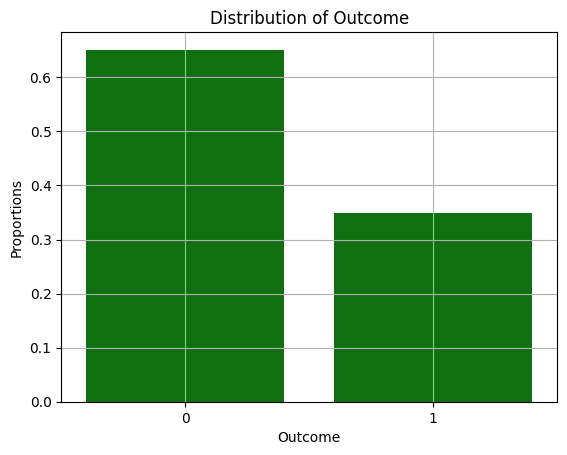

In [ ]:
barplot("Outcome", df)

This is the proportion of how many people were classified as Diabetic and Non-Diabetic, which is represented as 0 and 1 respectively. WE can see that almost half of the patients within this dataset were identiefied as diabetic.

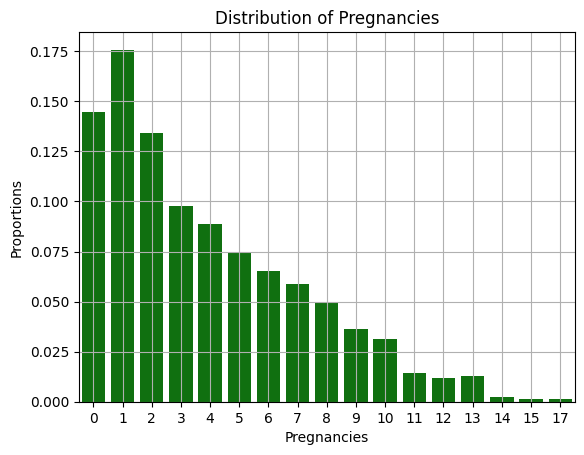

In [ ]:
barplot("Pregnancies", df)

Looking at the Distribution of Pregnancies, we can see it is positively skewed. With the single pregnancies having the highest proportions while 15 and 17 contribute the lowest proportions in the dataset.

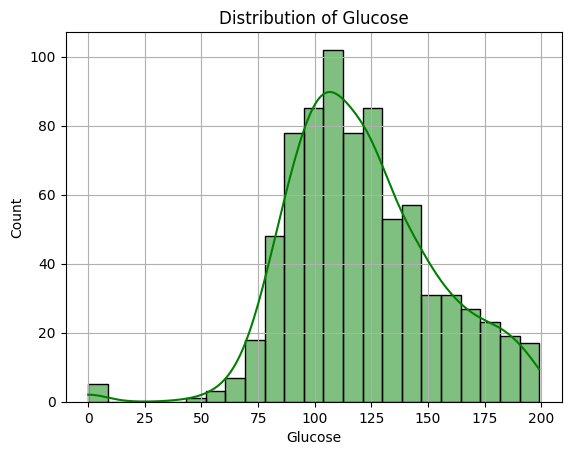

In [ ]:
histplot("Glucose", df)

The Distribution of Glucose is more or less displaying a Normal distribution with the mean of the data between 100-125 mg/dL. But there seems to be an unsual peak at the zero entry of glucose indicating some patient have zero glucose levels. This must be an error or the values can be regarded as missing values.

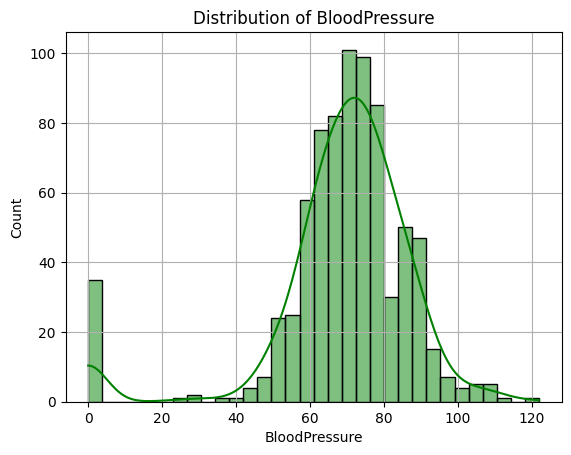

In [ ]:
histplot("BloodPressure", df)

The Distribution of Blood pressure is seemingly normally distributed with the mean found between 60-80 mmHg. There is also an unsual peak at the zero entry indicating the patients have zero blood pressure. Unless the patients were deceased, it is not possible and we can take those values as missing.

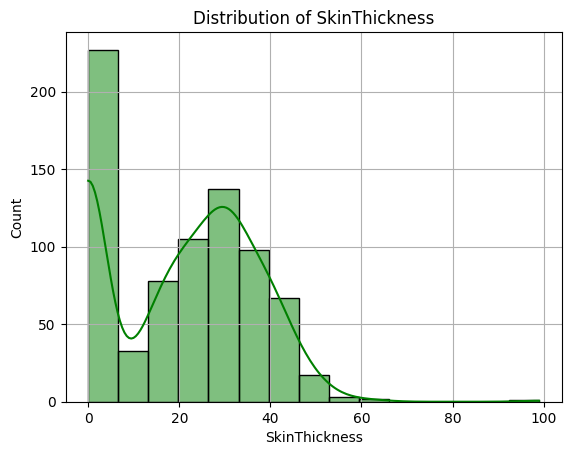

In [ ]:
histplot("SkinThickness", df)


The Distribution of Skin thickness has an unusal peak at zero entry as well. Unless the patients are invisible, this entry can also be regarded as missing values. If we ignored the zero entry and looked at the second peak, we could see some sort of normal distribution.

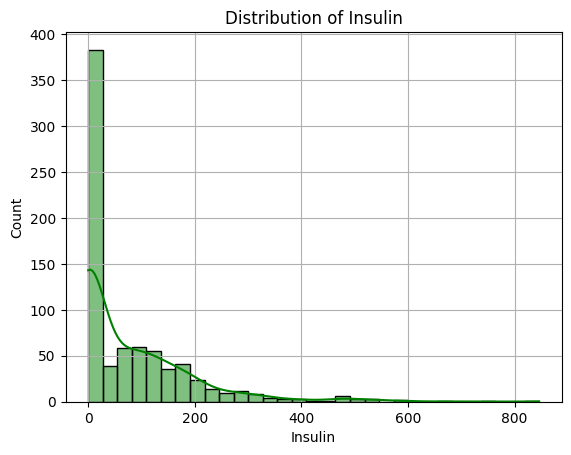

In [ ]:
histplot("Insulin", df)

Looking at the Distribution of Insulin, we can see that is is positively skewed, but there is also an unsual peak at zero, this would indicate that some patients have zero insulin. Although it is not impossible to have zero insulin, it does raise a question on why so many patients have zero insulin. Especially if you follow the distribution on the data on the right.

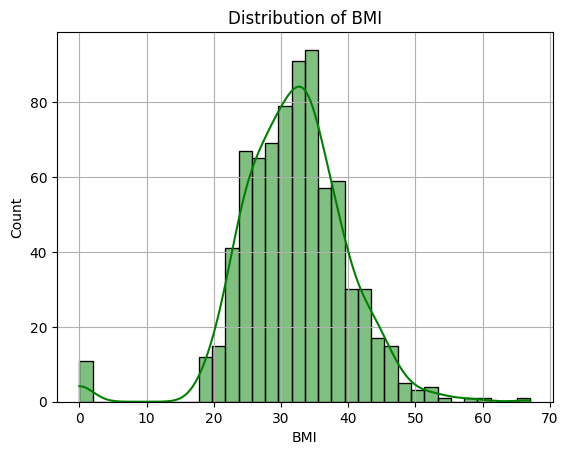

In [ ]:
histplot("BMI", df)

The distribution of BMI appears to have a Normal Distribution with the mean around 30. There is also an unsual small peak at the zero entry indicating patients have zero BMI. This is scientifically not possible so we can assume these are missing values.

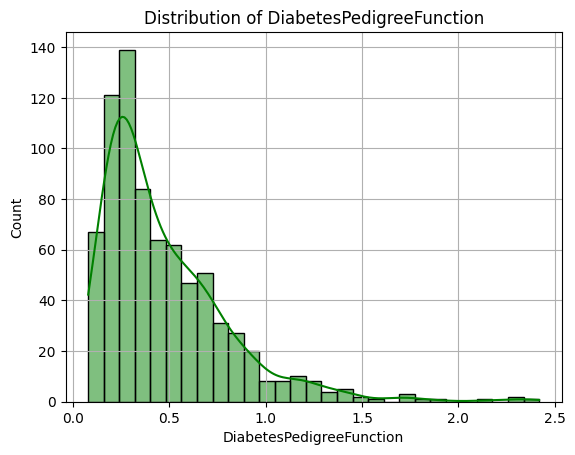

In [ ]:
histplot("DiabetesPedigreeFunction", df)

The distribution of the Diabetes Pedigree Function is positively skewed, with the peak around 0.25 and the lowset values are seen around 2.0 - 2.5.


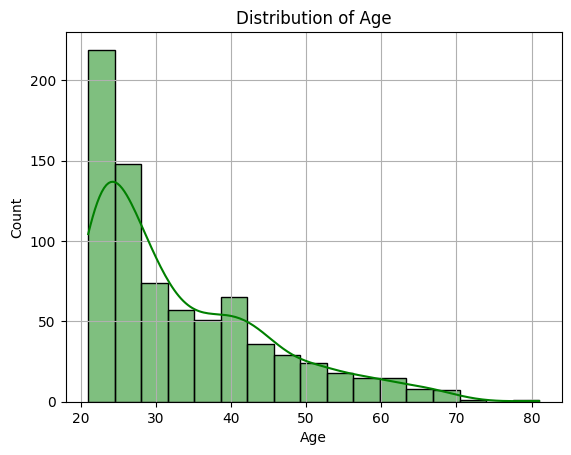

In [ ]:
histplot("Age", df)

The distribution of Age is postively skewed, with the peak indicated between the age group of 20-30.

### ***Bivariate Analysis***

In [ ]:
# Creating plots for bivariate analysis
# Creating a scatter plot for the continuous variables in the dataset

def scatterplot(data, feature1, feature2):
    sns.scatterplot(x = df[feature1], y = df[feature2], color='g')
    plt.title(f'{feature1} VS {feature2}')
    plt.grid()
    return plt.show()

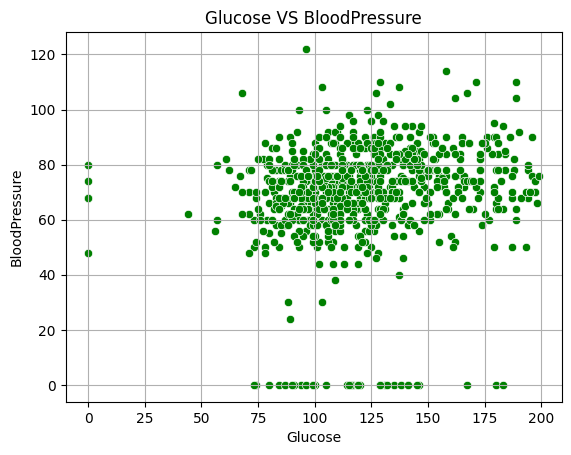

In [ ]:
scatterplot(df, "Glucose", "BloodPressure")

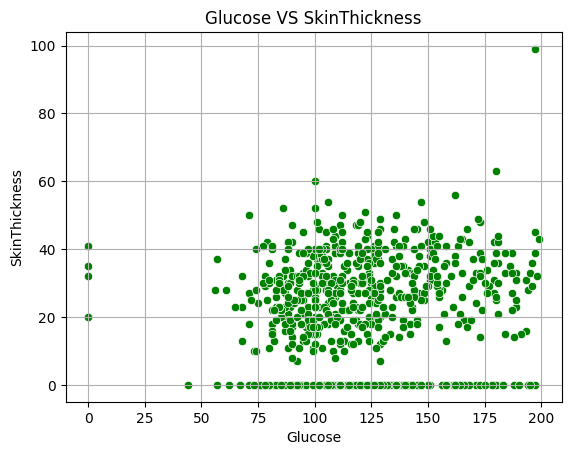

In [ ]:
scatterplot(df, "Glucose", "SkinThickness")

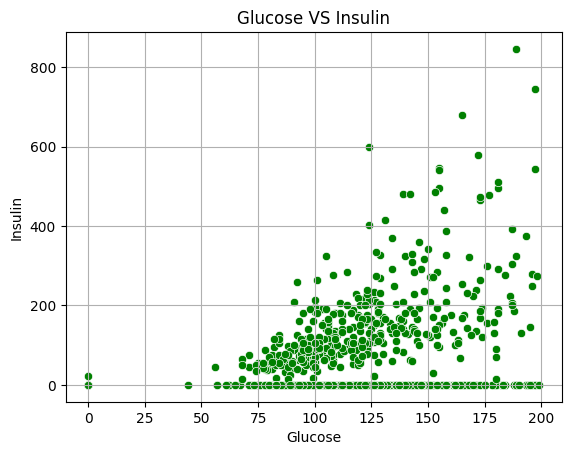

In [ ]:
scatterplot(df, "Glucose", "Insulin")

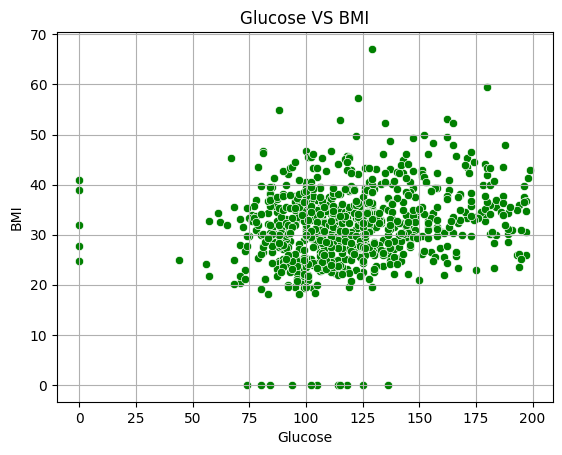

In [ ]:
scatterplot(df, "Glucose", "BMI")

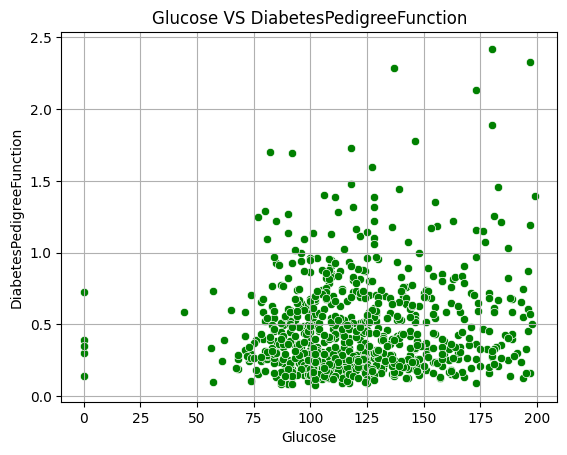

In [ ]:
scatterplot(df, "Glucose", "DiabetesPedigreeFunction")

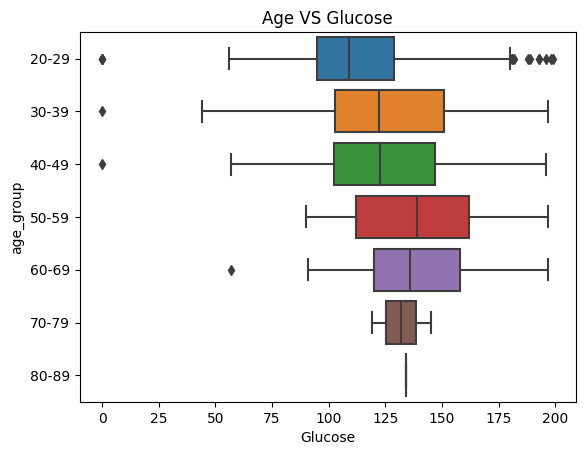

In [ ]:
# Creating a suitable bivariate analysis for age.

# Age bins to put the ages within our dataset
age_bins = [20, 30, 40, 50, 60, 70, 80, 90]
age_labels = ['20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89']

# Creating a new column called 'age_group' for our dataset
df['age_group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

sns.boxplot(y=df["age_group"], x=df["Glucose"])
plt.title('Age VS Glucose')
plt.show()

In [ ]:
del df["age_group"] # Discarding the Age group column after using it

<function matplotlib.pyplot.grid(visible=None, which='major', axis='both', **kwargs)>

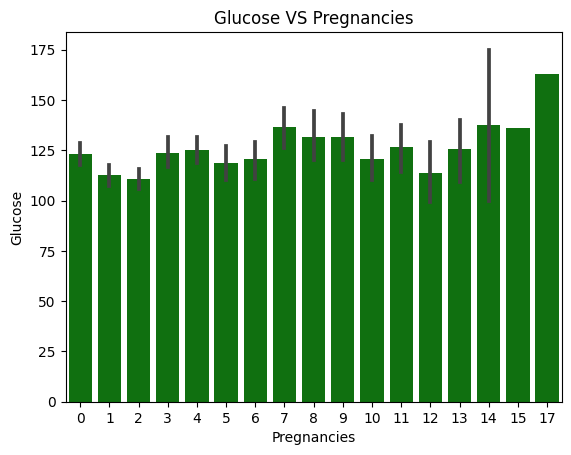

In [ ]:
# Plotting a barplot
sns.barplot(x=df['Pregnancies'], y=df['Glucose'], color='g')
plt.title('Glucose VS Pregnancies')
plt.grid

### ***Multivariate Analysis***


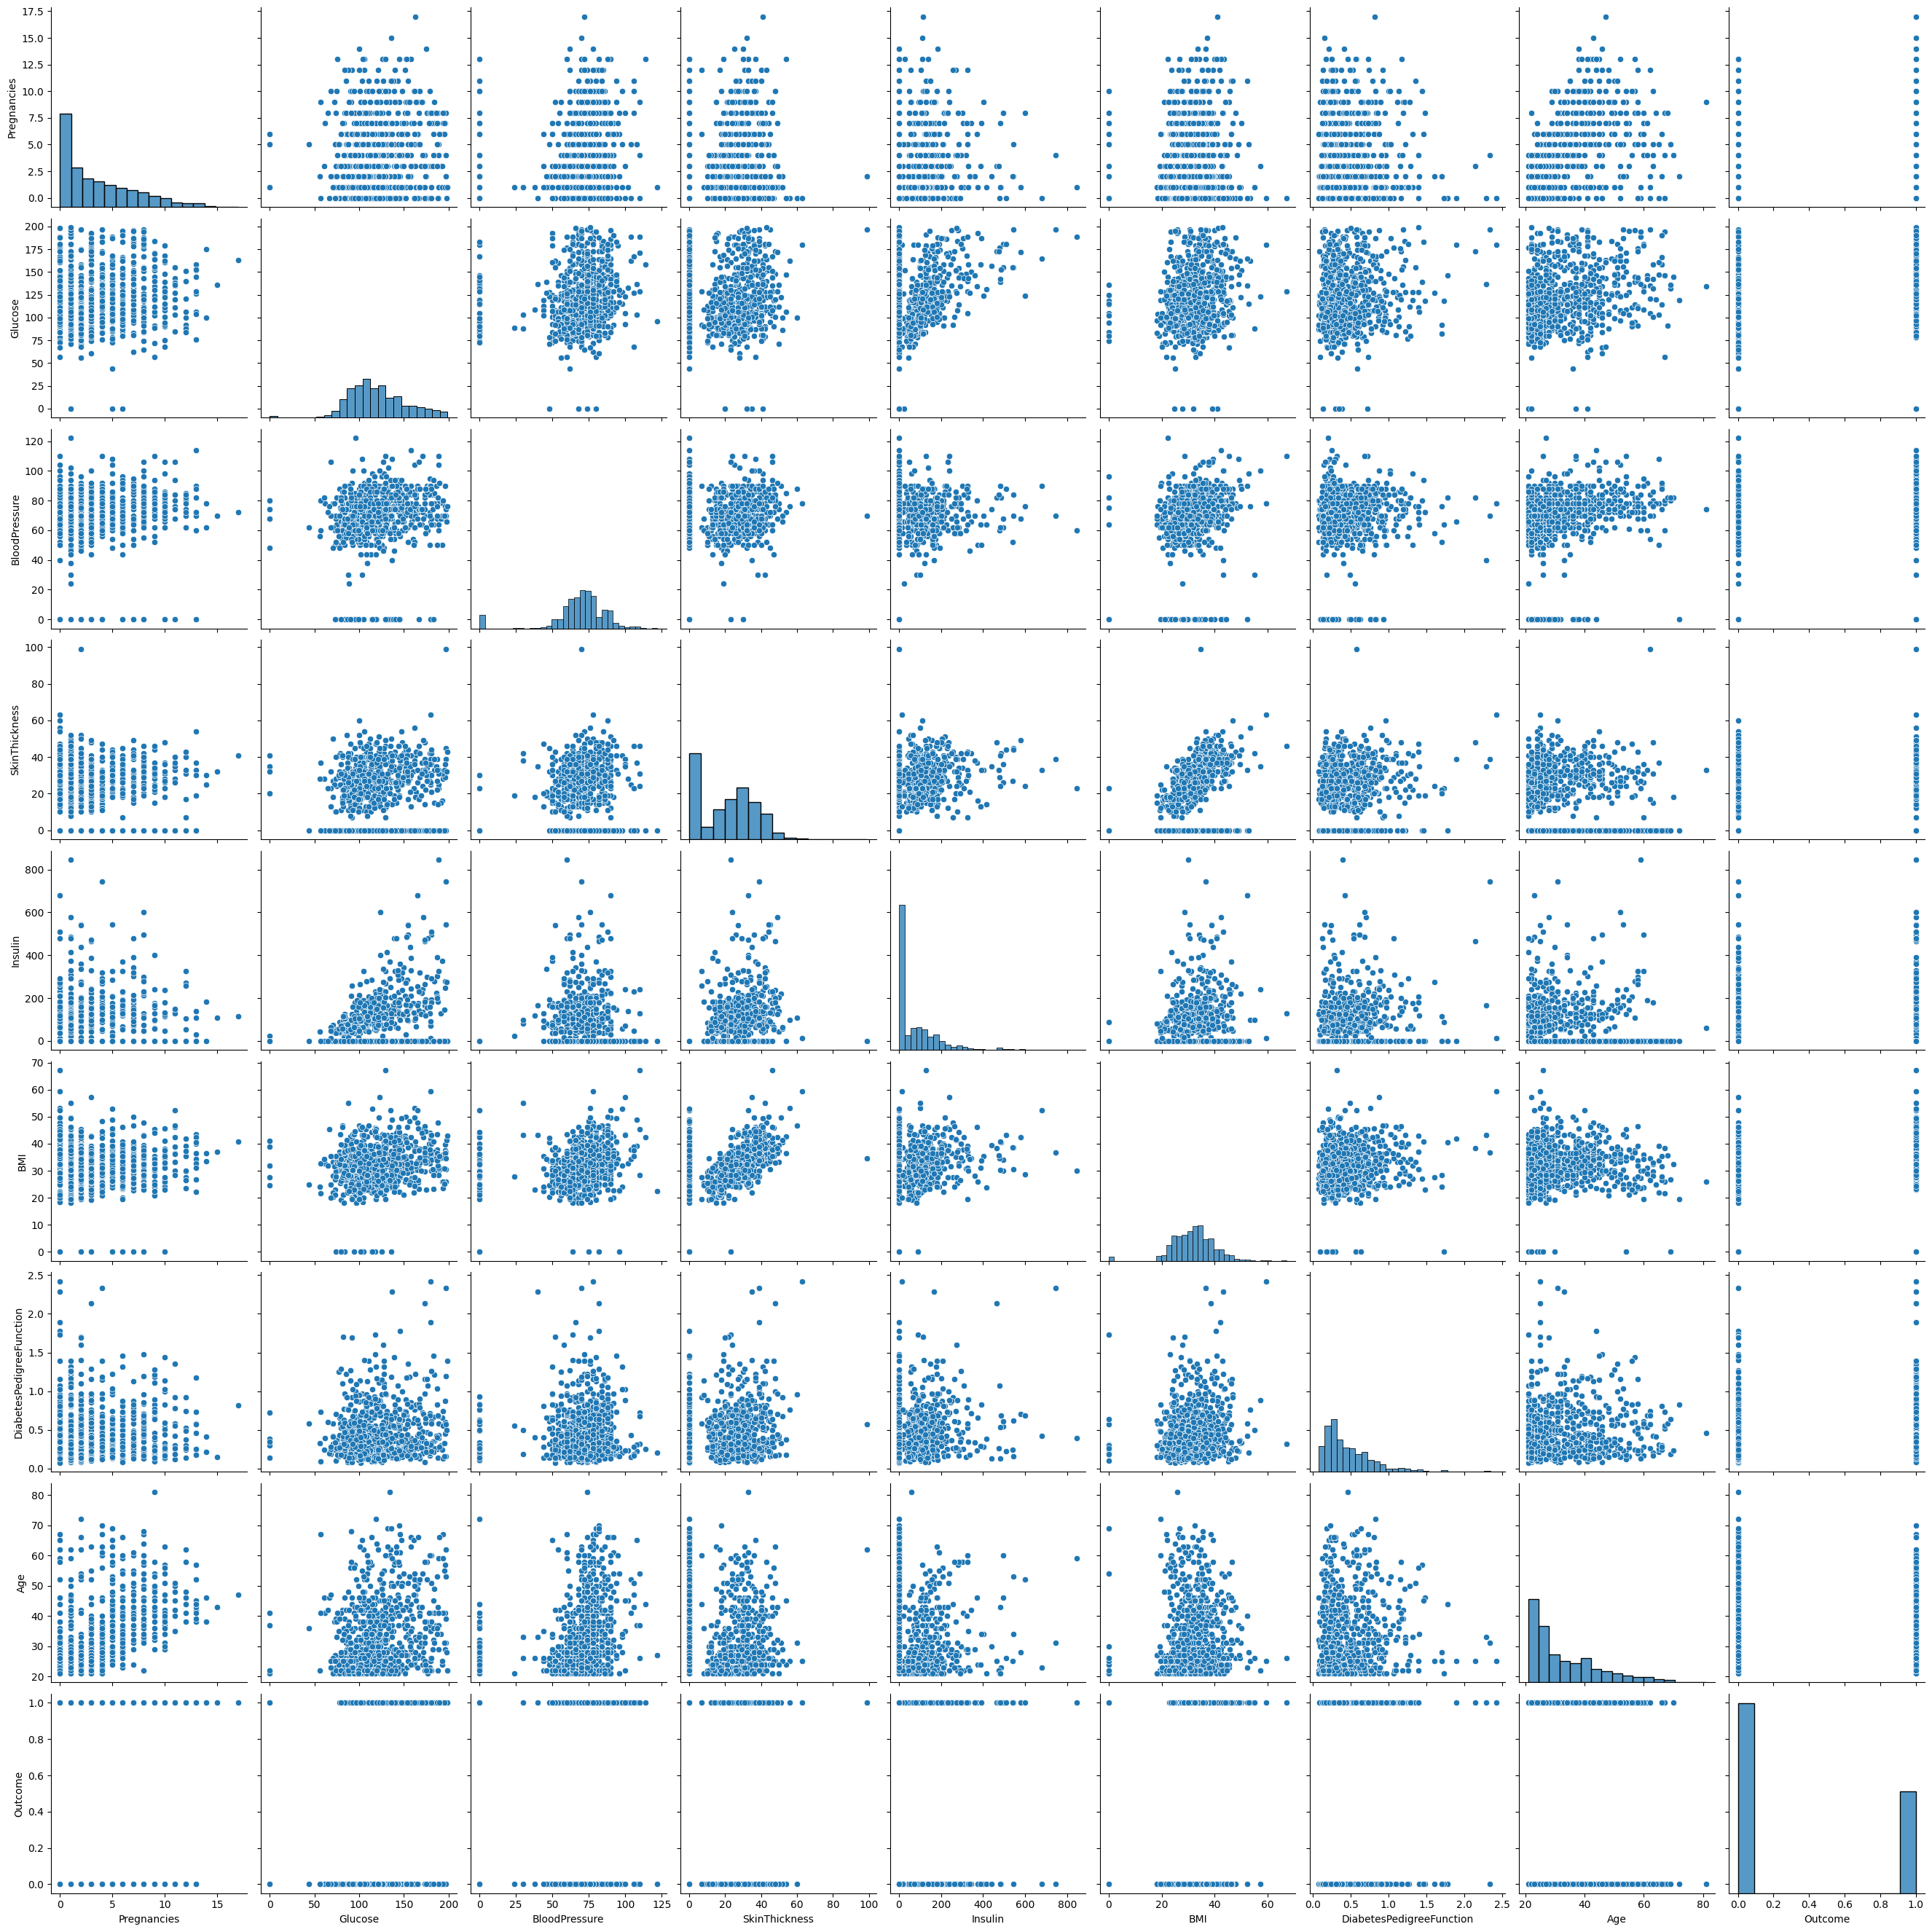

In [ ]:
# Creating Paiplot to get a complete overview of the Feature to Feature relationships
df = df.iloc[:, ]
sns.pairplot(data=df, height=3)

<Axes: >

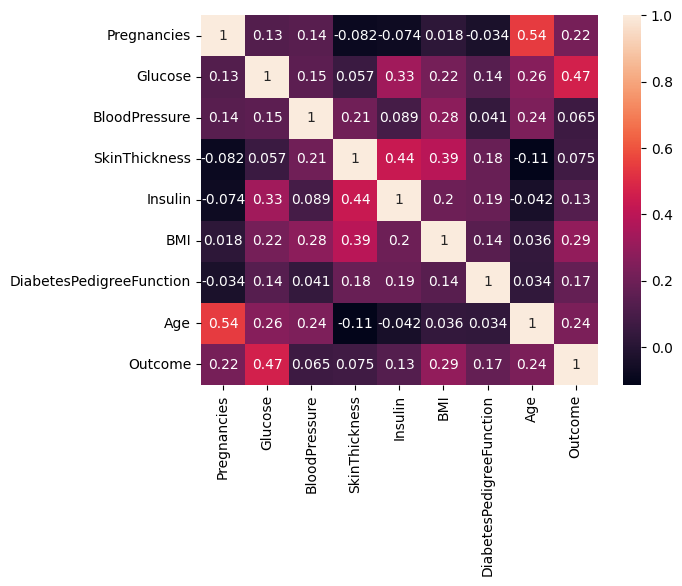

In [ ]:
# Creating a heatmap to analyze the corrletion between the features in the dataset
sns.heatmap(data=df.corr(), annot=True, cbar=True )

***
# ***Data Preprocessing***
***

After reviewing the distibution of each feature and the feature-to-feature relationship I conclude the following:
1. There are several zero entries which could be identified as missing values within the dataset.
2. Besides the zero entries, the features seem to be normally distributed.
3. There are features which cannot be included into the clustering algorithm.
4. An educated guess to make for the number clusters from the scatterplots would be two.

Way forward:
1. Imputing the zero entries using the mean should surfice given that the features are more or less Normally distributed. Then as for the skewed distribution, using a certain quartile values should do the job.
2. Features like pregnancies and age which are discrete values will be dropped from the dataframe since they can form clusters even after scaling. The Outcome column will also be dropped since this is an Unsupervised task.
3. Implementing two as an initial guess for clustering.

In [ ]:
del df['Pregnancies']
del df['Age']
del df['Outcome']

***Imputing The Zero Values***

In [ ]:
# Creating an imputer function to replace the zeros in the relevant features in our dataset
def Imputer(data):
    columns = data.columns
    for column in columns:
      if column != "Insulin": # Since Insulin does not display a normal distribution we would use the mean rather the 75th quantile value.
        data[column] = data[column].replace(0, data[column].mean()) # Imputing values with zero using the mean
      else:
         data[column] = data[column].replace(0, data[column].quantile(0.75)) # Imputing the values with zero using the 75th quantile value
    return data

In [ ]:
Imputer(df)

# Revisting the first five rows aftering imputing the zeros
df.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction
0,148.0,72.0,35.000000,127.25,33.6,0.627
1,85.0,66.0,29.000000,127.25,26.6,0.351
2,183.0,64.0,20.536458,127.25,23.3,0.672
3,89.0,66.0,23.000000,94.00,28.1,0.167
4,137.0,40.0,35.000000,168.00,43.1,2.288


## ***Principal Component Analysis***

***Dimensionality Reduction***

In [ ]:
# Choosing X values to train the model with.
X = df.iloc[:, :]

# Normalizing the training data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
# Creating a PCA function to reduce the features within our dataset
def dimensionality_reduction(data, column_names):
    variance = {} # storing the expalained variance of each princple component in a dictionary

    pca = PCA() # The PCA instance
    pca.fit(data)
    explained_variance = pca.explained_variance_ratio_  # Explained variance of each principal component
    for column, value in zip(column_names, explained_variance):
      variance[column] = round(value, 2)




    # Ploting the explained variance of our princpal components
    plt.plot(np.cumsum(explained_variance), marker='o')
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Explained Variance')
    plt.title('Explained Variance vs. Number of Components')
    plt.grid()

    return plt.show(), variance


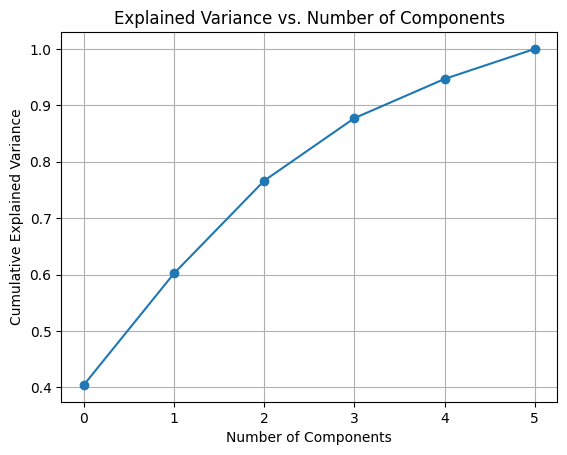

(None,
 {'Glucose': 0.4,
  'BloodPressure': 0.2,
  'SkinThickness': 0.16,
  'Insulin': 0.11,
  'BMI': 0.07,
  'DiabetesPedigreeFunction': 0.05})

In [ ]:
columns = X.columns
dimensionality_reduction(X_scaled, columns)

After implementing the dimensionalty reduction algorithm we can see that at least 3 Principal Components can explain at least 76% of the dataset. With Glucose being 0.4, Blood Pressure being 0.2 and Skin Thickness being 0.16. I will use these 3 features. Therefore we have reduced are dataset from 6 to 3 features.

In [ ]:
# Creating a dataframe consisting of the components that explain about 80% of variance of dataset.
df_reduced = pd.DataFrame(X_scaled, columns=X.columns)
df_reduced = df_reduced.iloc[:,0:3]
df_reduced.head()

,Glucose,BloodPressure,SkinThickness
0,0.670968,0.489796,0.304348
1,0.264516,0.428571,0.239130
2,0.896774,0.408163,0.147135
3,0.290323,0.428571,0.173913
4,0.600000,0.163265,0.304348


***
# ***Modelling***
***

 ***The Model***

In [ ]:
# Creating the clustering model
model = KMeans(n_clusters=2, n_init="auto")

***Model Evaluation***

In [ ]:
# Creating a function to train, plot and evaluate the model

def Model_Evaluation(data, model):

    # Iterrating through the reduced dataset
    for column in data.columns:
        if column != "Glucose":
            feature1 = "Glucose"       # Chosen to use Glucose as an anchor to cluster with the selected feature2
            feature2 = column

            X = data[[feature1, feature2]] # Putting the two features in their own dataset
            clustering = model.fit(X) # Training the model

            labels = clustering.labels_ # The model labels of the data
            centroids = clustering.cluster_centers_ # The model centroids of the clusters
            print("Cluster Centroids:\n", centroids)

            # Evaluating the model using different metrics
            print(f"\n The Within Cluster Sum Of Squares score for the cluster is: {clustering.inertia_}")

            silhouette_value = silhouette_score(X, clustering.labels_)
            print(f"The Sihouellette Score for the cluster is: {silhouette_value}")

            davies_bouldin_value = davies_bouldin_score(X, clustering.labels_)
            print(f"The Davies Bouldin Score for the cluster is: {davies_bouldin_value}")


            # Plotting the resulting clusters
            plt.scatter(X[feature1], X[feature2], c=labels, cmap='viridis')
            plt.scatter(centroids[:, X.columns.get_loc(feature1)], centroids[:, X.columns.get_loc(feature2)], marker='x', s=100, c='red', label='Cluster Centroids')
            plt.title("K-Means Clustering Results")
            plt.xlabel(feature1)
            plt.ylabel(feature2)
            plt.legend()
            plt.show()

    return


Cluster Centroids:
 [[0.38447586 0.46414593]
 [0.72014015 0.54540452]]

 The Within Cluster Sum Of Squares score for the cluster is: 20.52083661193263
The Sihouellette Score for the cluster is: 0.4480860594517558
The Davies Bouldin Score for the cluster is: 0.8541977394026814


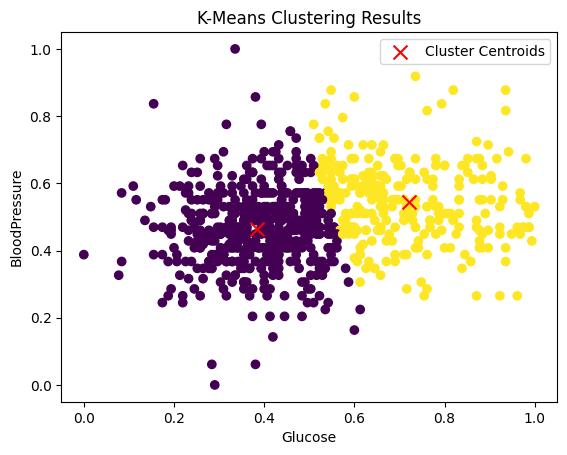

Cluster Centroids:
 [[0.39050145 0.20068026]
 [0.73600839 0.23949749]]

 The Within Cluster Sum Of Squares score for the cluster is: 17.76791041340557
The Sihouellette Score for the cluster is: 0.4743929995057344
The Davies Bouldin Score for the cluster is: 0.8066188884608461


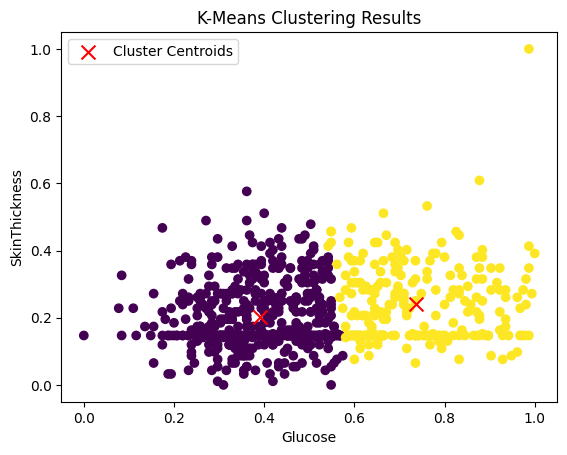

In [ ]:
Model_Evaluation(df_reduced, model)

## ***Hyperparameter Tuning***

In [ ]:
# Parameters for hyperparameter tuning
param_grid = {'n_clusters': [2, 3, 4, 5]}

In [ ]:
# Creating a function to train, tune and evaluate the hypertuned model

def Model_Evaluation_Hyperparameter_tuning(data, model):

    # Iterrating through the reduced dataset
    for column in data.columns:
        if column != "Glucose":
            feature1 = "Glucose"       # Chosen to use Glucose as an anchor to cluster with the selected feature2
            feature2 = column

            X = data[[feature1, feature2]] # Putting the two features in their own dataset
            clustering = model.fit(X) # Training the model
            Tuned_params = model.best_params_
            Tuned_model = model.best_estimator_ # The tuned model

            labels = Tuned_model.labels_ # The model labels of the data
            centroids = Tuned_model.cluster_centers_ # The model centroids of the clusters
            print("Cluster Centroids:\n", centroids)

            # Evaluating the model using different metrics
            print(f"\n The Within Cluster Sum Of Squares score for the cluster is: {Tuned_model.inertia_}")

            silhouette_value = silhouette_score(X, Tuned_model.labels_)
            print(f"The Sihouellette Score for the cluster is: {silhouette_value}")

            davies_bouldin_value = davies_bouldin_score(X, Tuned_model.labels_)
            print(f"The Davies Bouldin Score for the cluster is: {davies_bouldin_value}")


            # Plotting the resulting clusters
            plt.scatter(X[feature1], X[feature2], c=labels, cmap='viridis')
            plt.scatter(centroids[:, X.columns.get_loc(feature1)], centroids[:, X.columns.get_loc(feature2)], marker='x', s=100, c='red', label='Cluster Centroids')
            plt.title("K-Means Clustering Results")
            plt.xlabel(feature1)
            plt.ylabel(feature2)
            plt.legend()
            plt.grid()
            plt.show()

    return




***Random Search CV***

Cluster Centroids:
 [[0.32691641 0.52717638]
 [0.83125    0.51867956]
 [0.56185046 0.64226128]
 [0.53593977 0.43092203]
 [0.32606173 0.35266481]]

 The Within Cluster Sum Of Squares score for the cluster is: 9.944801118485737
The Sihouellette Score for the cluster is: 0.33349579972687815
The Davies Bouldin Score for the cluster is: 0.9431577814263836


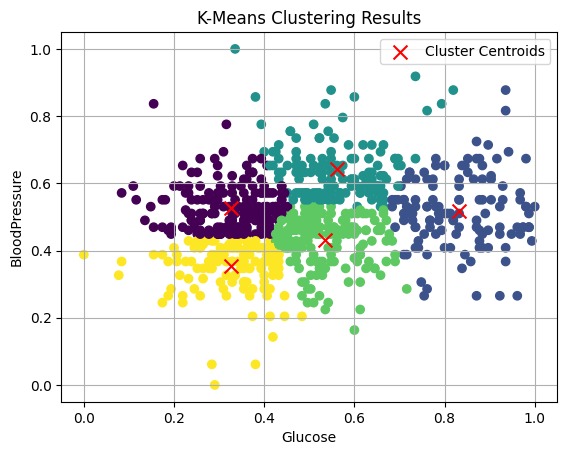

Cluster Centroids:
 [[0.69354839 0.34096791]
 [0.30897557 0.15887004]
 [0.53465186 0.15084258]
 [0.85663837 0.19603952]
 [0.42161446 0.33531436]]

 The Within Cluster Sum Of Squares score for the cluster is: 7.924392648510617
The Sihouellette Score for the cluster is: 0.3965384931922285
The Davies Bouldin Score for the cluster is: 0.8825839259638825


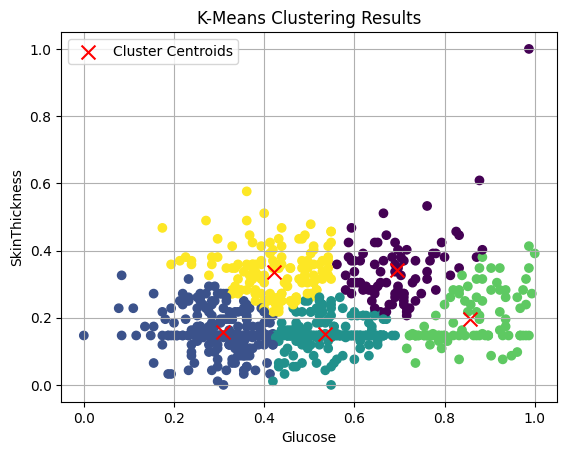

In [ ]:
random_search = RandomizedSearchCV(KMeans(n_init='auto'), param_distributions=param_grid, n_iter=5, cv=5)
Model_Evaluation_Hyperparameter_tuning(df_reduced, random_search)

***Elbow Method***

In [ ]:
def elbow_method(data):
  wcss = [] # list to store the within cluster sum of squares to plot

  for k in range(1, 11): # using a for loop to test the different k values
      model = KMeans(n_clusters=k, random_state=42, n_init="auto") # k means clustering model
      model.fit(data.iloc[:, :2]) # training the model two features from our dataset
      wcss.append(model.inertia_)

  # Creating a plot to show of each k value performs
  plt.plot(range(1, 11), wcss, marker='o')
  plt.title('Elbow Method')
  plt.xlabel('Number of Clusters (K)')
  plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
  plt.grid()

  return plt.show()

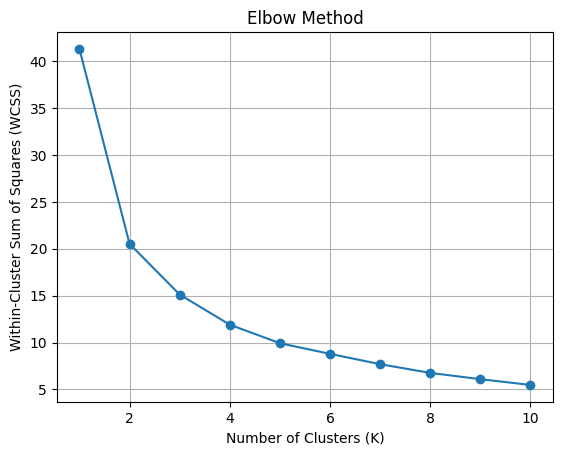

In [ ]:
elbow_method(df_reduced)

Using the elbow method we can see that the kink is at k = 2. But when i was using the Random Search algorithm it chose to use k = 5. Now my conclusion is that the Random Search choose 5 since it displays the lowest WCSS value indicating tighter clusters. But since we also want tight and meaning clusters, i will use k = 2 value for the Anomaly detector.

***
# ***Anomaly Detection***
***

In [ ]:
# Function to calculate the distance between the centroids and the data points within the cluster in order to determine the outliers
def euclidean_distance(x, y):
    common_features = min(len(x), len(y))

    return np.sqrt(np.sum((x[:common_features] - y[:common_features]) ** 2))

In [ ]:
# creating a function to detect the anomalies within out dataset

def anomaly_detector(model, data, feature1, feature2):

    X = data[[feature1, feature2]] # creating a dataframe for two features we will be clustering
    anomalies =[] # list to store values that we will consdier as anomalies

    model.fit(X) # training the model
    centroids = model.cluster_centers_ # cluster centers

    midpoint = np.mean(centroids, axis=0) # computing the midpoint between two centroids
    # Since we have evaluated k = 2, we only have to deal with two centroids.

    for index, row in X.iterrows():   # looping throught the rows in the dataset
            midpoint_distance = euclidean_distance(row, midpoint) # computing the distance between each row and midpoint

            if midpoint_distance > 0.4: # Setting a threshold for anomalies
                anomalies.append(index)  # appending the index of the rows

    # creating an anomalies dataframe
    anomalies_df = X.loc[anomalies]

    if anomalies_df.empty:
        print("No Anomalies Detected.")
    else:
        print("Anomalies Detected!")

    # scatter plot of non-anomalies in green
    plt.scatter(X.loc[~X.index.isin(anomalies), feature1], X.loc[~X.index.isin(anomalies), feature2], c='green', label='Non-Anomalies')

    # scatter plot of anomalies in orange
    plt.scatter(anomalies_df[feature1], anomalies_df[feature2], c='orange', label='Anomalies')

    # scatter plot of cluster centers
    plt.scatter(centroids[:, X.columns.get_loc(feature1)], centroids[:, X.columns.get_loc(feature2)], marker='x', s=100, c='red', label='Cluster Centers')


    plt.title("Anomaly Detection Results")
    plt.xlabel(feature1)
    plt.ylabel(feature2)
    plt.legend()
    plt.show()


    return

Anomalies Detected!


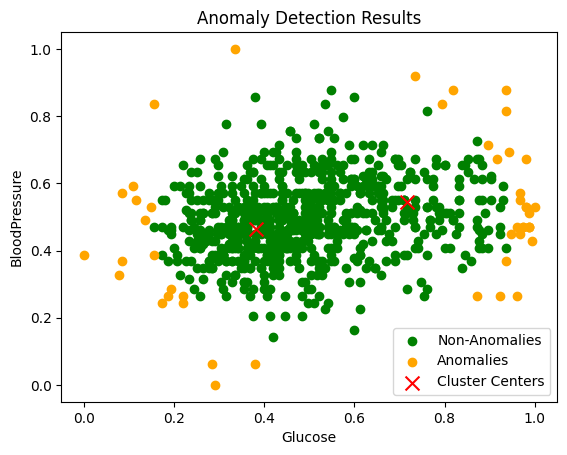

In [ ]:
feature1 = "Glucose"
feature2 = "BloodPressure"

anomaly_detector(model, df_reduced, feature1, feature2)